In [9]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
from datetime import datetime

import matplotlib.pyplot as plt
import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

FOLDER = 'out'

In [10]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 60


In [11]:

compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        'representation': res_full['data_summary']['representation'],
        #'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true'])),
        'test_size': len(res['all_y_true'])
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)
print(compiled_res_list)

[{'size': 10, 'representation': 'iupac', 'accuracy': 0.52, 'f1_macro': 0.5073891625615763, 'f1_micro': 0.52, 'kappa': 0.040000000000000036, 'num_epochs': 25, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 150, 'representation': 'InChI', 'accuracy': 0.94, 'f1_macro': 0.9399759903961584, 'f1_micro': 0.94, 'kappa': 0.8799999999999999, 'num_epochs': 25, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 50, 'representation': 'SMILES', 'accuracy': 0.9, 'f1_macro': 0.8999599839935974, 'f1_micro': 0.9, 'kappa': 0.8, 'num_epochs': 25, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 150, 'representation': 'omega', 'accuracy': 0.94, 'f1_macro': 0.9397832195905259, 'f1_micro': 0.94, 'kappa': 0.8799999999999999, 'num_epochs': 25, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 50, 'representation': 'iupac', 'accuracy': 0.8, 'f1_macro': 0.7916666666666667, 'f1_micro': 0.8, 'kappa': 0.6000000000000001, 'num_epochs': 25, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 100, 'represen

In [12]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['bins', 'num_epochs', 'representation', 'size']).agg(['mean', 'sem'])


In [13]:
grouped_res


accuracy            f1_macro            \
                                         mean       sem      mean       sem   
bins num_epochs representation size                                           
2    25         InChI          10    0.880000  0.046188  0.876616  0.048582   
                               25    0.866667  0.017638  0.864760  0.018431   
                               50    0.906667  0.024037  0.906447  0.024183   
                               100   0.933333  0.033333  0.932876  0.033562   
                               150   0.940000  0.000000  0.939912  0.000064   
                SMILES         10    0.813333  0.048074  0.805050  0.055708   
                               25    0.880000  0.011547  0.878666  0.012077   
                               50    0.886667  0.013333  0.886364  0.013435   
                               100   0.933333  0.017638  0.933291  0.017633   
                               150   0.920000  0.020000  0.919952  0.019992   
                iupac          10    0.606667  0.059255  0.584373  0.057213   
                               25    0.846667  0.059255  0.846106  0.059617   
                               50    0.866667  0.033333  0.863648  0.035991   
                               100   0.953333  0.017638  0.953331  0.017636   
                               150   0.946667  0.017638  0.946484  0.017767   
                omega          10    0.740000  0.061101  0.658232  0.122646   
                               25    0.740000  0.030551  0.728317  0.037576   
                               50    0.786667  0.024037  0.785078  0.024443   
                               100   0.846667  0.017638  0.846299  0.017724   
                               150   0.926667  0.006667  0.926423  0.006682   

                                     f1_micro               kappa            \
                                         mean       sem      mean       sem   
bins num_epochs representation size                                           
2    25         InChI          10    0.880000  0.046188  0.760000  0.092376   
                               25    0.866667  0.017638  0.733333  0.035277   
                               50    0.906667  0.024037  0.813333  0.048074   
                               100   0.933333  0.033333  0.866667  0.066667   
                               150   0.940000  0.000000  0.880000  0.000000   
                SMILES         10    0.813333  0.048074  0.626667  0.096148   
                               25    0.880000  0.011547  0.760000  0.023094   
                               50    0.886667  0.013333  0.773333  0.026667   
                               100   0.933333  0.017638  0.866667  0.035277   
                               150   0.920000  0.020000  0.840000  0.040000   
                iupac          10    0.606667  0.059255  0.213333  0.118509   
                               25    0.846667  0.059255  0.693333  0.118509   
                               50    0.866667  0.033333  0.733333  0.066667   
                               100   0.953333  0.017638  0.906667  0.035277   
                               150   0.946667  0.017638  0.893333  0.035277   
                omega          10    0.740000  0.061101  0.484444  0.119340   
                               25    0.740000  0.030551  0.480000  0.061101   
                               50    0.786667  0.024037  0.573333  0.048074   
                               100   0.846667  0.017638  0.693333  0.035277   
                               150   0.926667  0.006667  0.853333  0.013333   

                                         lr      test_size       
                                       mean  sem      mean  sem  
bins num_epochs representation size                              
2    25         InChI          10    0.0003  0.0      50.0  0.0  
                               25    0.0003  0.0      50.0  0.0  
                               50    0.0003  0.0      50.0  0.0  
     

/tmp/ipykernel_2471817/1683385094.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.8, top=1, bottom=0.2)


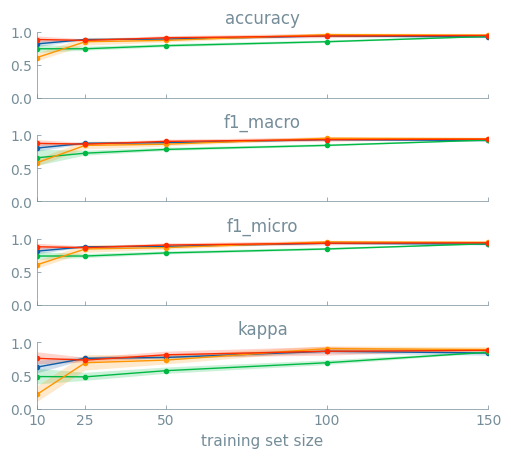

In [14]:
from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'SMILES'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH),constrained_layout = True , sharex=True)
for REPRESENTATION in ['SMILES', 'omega', 'iupac', 'InChI']:
    for num_epochs in [25]:
        for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
            ax[i].plot(
                grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
                grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
                marker='o',
                label=f'{num_epochs} epochs'
            )
            ax[i].fill_between(
                grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
                grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
                grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
                alpha=0.2
            )
            ax[i].set_ylim(0,1)
            ax[i].set_title(metric)
            ax[i].set_xticks((list(compiled_res['size'].unique())))
        #ylabel_top('accuracy', ax=ax[0])
        #ylabel_top(r'F$_1$ macro', ax=ax[1])
        #ylabel_top(r'F$_1$ micro', ax=ax[2])
        #ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('training set size')


#matplotx.line_labels(ax[0])
now = datetime.now().strftime('%Y%m%d_%H%M') 
#fig.suptitle('Melting Point', fontsize=16)

import matplotlib.lines as mlines


legend = [mlines.Line2D([], [], color='#1f77b4', label='SMILES'),
          mlines.Line2D([], [], color='orange', label='Name'),
          mlines.Line2D([], [], color='green', label='SMILES lenght')
]
#fig.legend(handles= legend, loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplots_adjust(hspace=0.8, top=1, bottom=0.2)
fig.savefig(f'{now}-MeltingPoint-binary-{BINS}bin-classification-results.pdf', bbox_inches='tight')

KeyError: (2, 8, 'formula_eqPressure_25C')

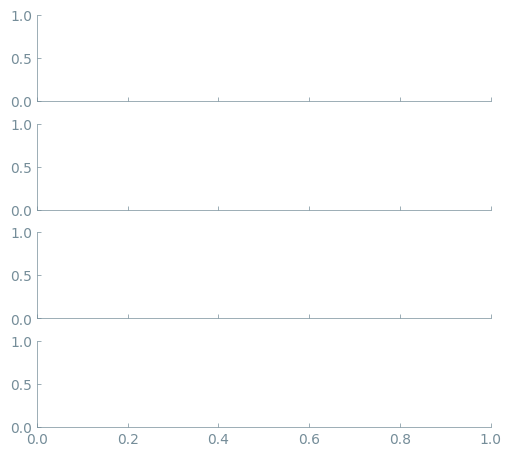

In [15]:
from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'formula_eqPressure_25C'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH),constrained_layout = True, sharex=True)
 
for num_epochs in [8, 16 , 25]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
        ax[i].set_title(metric)
        ax[i].set_xticks(compiled_res['size'].unique())
    #ylabel_top('accuracy', ax=ax[0])
    #ylabel_top(r'F$_1$ macro', ax=ax[1])
    #ylabel_top(r'F$_1$ micro', ax=ax[2])
    #ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')


#matplotx.line_labels(ax[0])
now = datetime.now().strftime('%Y%m%d_%H%M') 
fig.suptitle('Hydrides - {} - {}'.format(REPRESENTATION, 'binary'), fontsize=16)
fig.savefig(f'{now}_hydrides-{REPRESENTATION}-binary-{BINS}bin-classification-results.pdf', bbox_inches='tight')